In [1]:
import numpy as np
from scipy.optimize import minimize

# Sample data
R_base = 0.26  # Base lease rate
data = [
    {"E": 0.4, "C": 0.8, "T": 12, "target": 0.255},
    {"E": 0.7, "C": 0.6, "T": 36, "target": 0.262},
    {"E": 0.5, "C": 0.9, "T": 24, "target": 0.258},
]

T_ref = 12  # Reference tenor

# Objective function
def objective(params):
    k1, k2, k3 = params
    error = 0
    for customer in data:
        E = customer["E"]
        C = customer["C"]
        T = customer["T"]
        R_target = customer["target"]
        
        # Predicted adjusted rate
        R_predicted = R_base * (1 - k1 * (1 - E) - k2 * C + k3 * np.log(1 + T / T_ref))
        
        # Squared error
        error += (R_predicted - R_target) ** 2
    return error

# Initial guess for k1, k2, k3
initial_guess = [0.1, 0.1, 0.05]

# Bounds for k1, k2, k3
bounds = [(0, 0.5), (0, 0.5), (0, 0.2)]

# Minimize the objective function
result = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')

# Optimized parameters
k1, k2, k3 = result.x
print(f"Optimized k1: {k1:.4f}, k2: {k2:.4f}, k3: {k3:.4f}")


Optimized k1: 0.0493, k2: 0.0020, k3: 0.0171


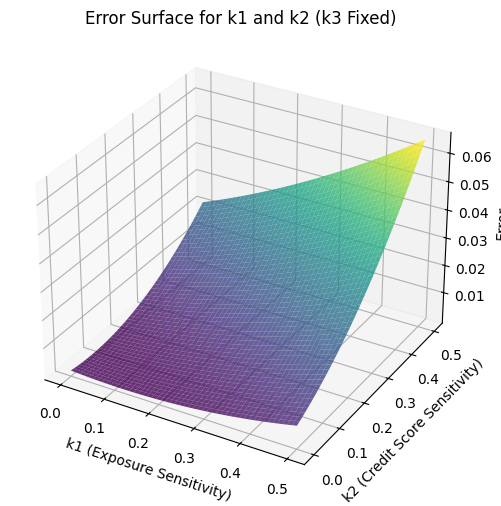

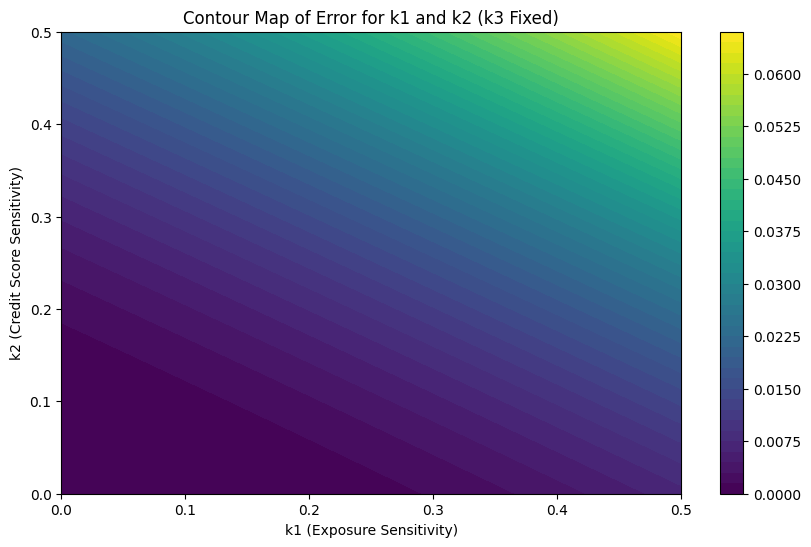

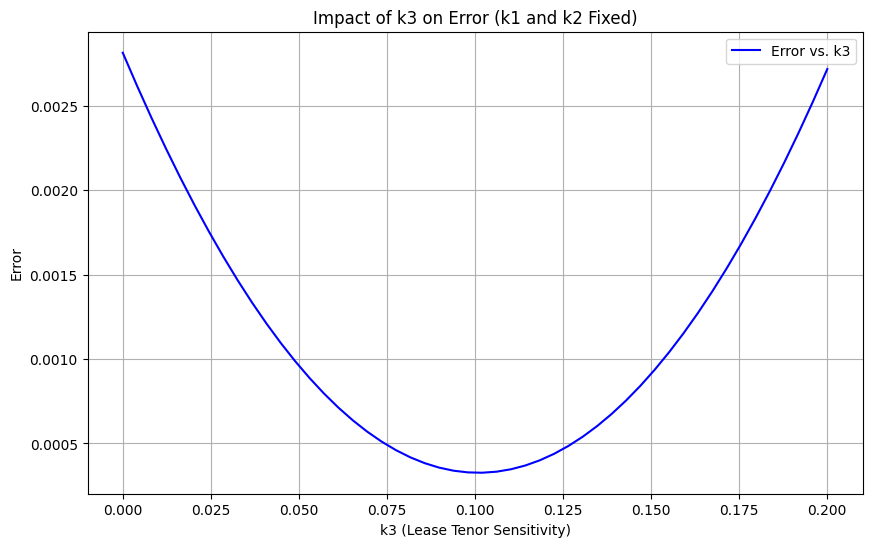

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
R_base = 0.26  # Base lease rate
data = [
    {"E": 0.4, "C": 0.8, "T": 12, "target": 0.255},
    {"E": 0.7, "C": 0.6, "T": 36, "target": 0.262},
    {"E": 0.5, "C": 0.9, "T": 24, "target": 0.258},
]

T_ref = 12  # Reference tenor

# Objective function to calculate error
def compute_error(k1, k2, k3):
    error = 0
    for customer in data:
        E = customer["E"]
        C = customer["C"]
        T = customer["T"]
        R_target = customer["target"]
        
        # Predicted adjusted rate
        R_predicted = R_base * (1 - k1 * (1 - E) - k2 * C + k3 * np.log(1 + T / T_ref))
        
        # Squared error
        error += (R_predicted - R_target) ** 2
    return error

# Generate a grid of k1 and k2 values (fix k3)
k1_values = np.linspace(0, 0.5, 50)
k2_values = np.linspace(0, 0.5, 50)
k3_fixed = 0.05  # Fixed value for k3

k1_grid, k2_grid = np.meshgrid(k1_values, k2_values)
error_grid = np.zeros_like(k1_grid)

# Compute error for each combination of k1 and k2
for i in range(k1_grid.shape[0]):
    for j in range(k1_grid.shape[1]):
        k1 = k1_grid[i, j]
        k2 = k2_grid[i, j]
        error_grid[i, j] = compute_error(k1, k2, k3_fixed)

# Plot the error surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k1_grid, k2_grid, error_grid, cmap='viridis', alpha=0.8)

# Labels
ax.set_xlabel("k1 (Exposure Sensitivity)")
ax.set_ylabel("k2 (Credit Score Sensitivity)")
ax.set_zlabel("Error")
ax.set_title("Error Surface for k1 and k2 (k3 Fixed)")

plt.show()

# Contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(k1_grid, k2_grid, error_grid, levels=50, cmap='viridis')
plt.colorbar(contour)

# Labels
plt.xlabel("k1 (Exposure Sensitivity)")
plt.ylabel("k2 (Credit Score Sensitivity)")
plt.title("Contour Map of Error for k1 and k2 (k3 Fixed)")

plt.show()

# Exploring k3's impact by fixing k1 and k2
k3_values = np.linspace(0, 0.2, 50)
error_k3 = []

k1_fixed = 0.1
k2_fixed = 0.1

# Compute error for varying k3
for k3 in k3_values:
    error_k3.append(compute_error(k1_fixed, k2_fixed, k3))

# Plot k3 vs. error
plt.figure(figsize=(10, 6))
plt.plot(k3_values, error_k3, label="Error vs. k3", color='blue')
plt.xlabel("k3 (Lease Tenor Sensitivity)")
plt.ylabel("Error")
plt.title("Impact of k3 on Error (k1 and k2 Fixed)")
plt.legend()
plt.grid()
plt.show()


[{'T': 12, 'E': 0.1064, 'C': 0.625493049, 'target': 0.251010421}, {'T': 25, 'E': 0.4105, 'C': 0.498609684, 'target': 0.271154081}, {'T': 49, 'E': 0.6164, 'C': 0.513003907, 'target': 0.290217737}, {'T': 61, 'E': 0.5061, 'C': 0.423741244, 'target': 0.293632606}, {'T': 61, 'E': 0.5995, 'C': 0.440955131, 'target': 0.296796384}, {'T': 49, 'E': 0.6085, 'C': 0.530040738, 'target': 0.28959212}, {'T': 31, 'E': 0.6144, 'C': 0.548301997, 'target': 0.280734649}, {'T': 61, 'E': 0.7663, 'C': 0.510739464, 'target': 0.301690615}, {'T': 61, 'E': 0.7246, 'C': 0.442883736, 'target': 0.301442976}, {'T': 25, 'E': 0.1657, 'C': 0.543242041, 'target': 0.261124335}, {'T': 49, 'E': 0.2271, 'C': 0.505996189, 'target': 0.275777436}, {'T': 37, 'E': 0.2363, 'C': 0.600531326, 'target': 0.268475159}, {'T': 37, 'E': 0.2725, 'C': 0.461486926, 'target': 0.272522406}, {'T': 31, 'E': 0.2836, 'C': 0.520910276, 'target': 0.268879304}, {'T': 37, 'E': 0.3867, 'C': 0.558818247, 'target': 0.274913913}, {'T': 49, 'E': 0.4167, 'C

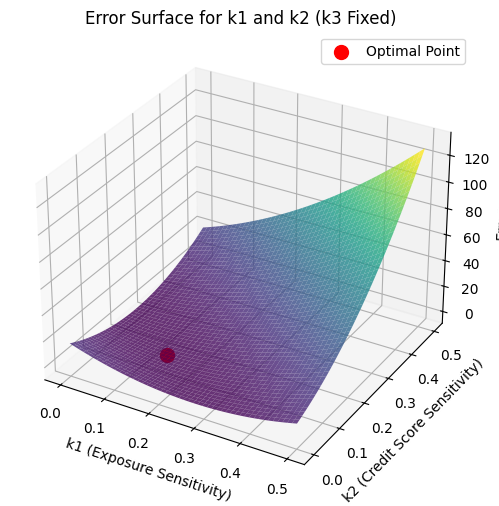

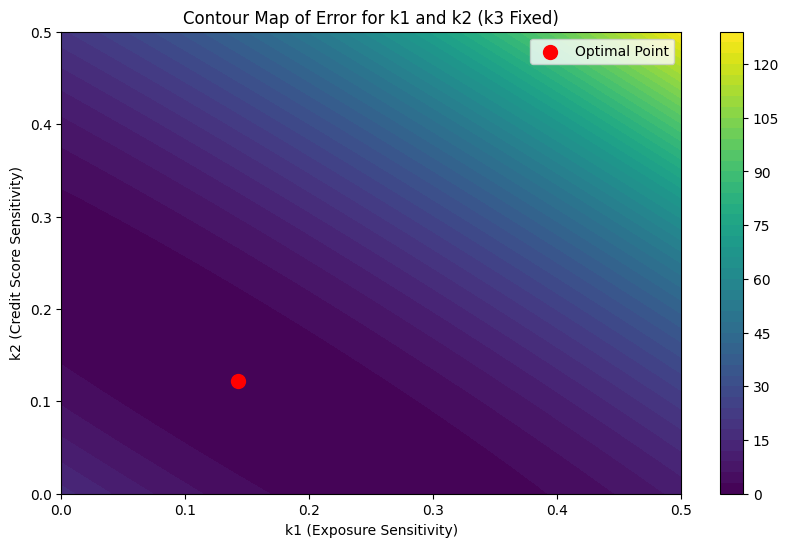

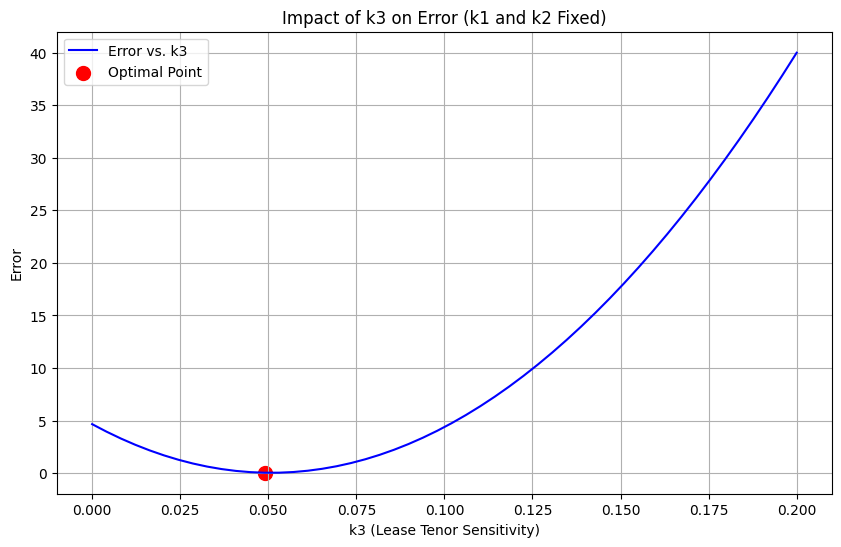

Optimal k1: 0.1429
Optimal k2: 0.1224
Optimal k3: 0.0490
Minimum Error: 0.035750


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# data
R_base = 0.30  # Base lease rate
# data = [
#     {"E": 0.4, "C": 0.8, "T": 12, "target": 0.255},
#     {"E": 0.7, "C": 0.6, "T": 36, "target": 0.262},
#     {"E": 0.5, "C": 0.9, "T": 24, "target": 0.258},
# ]

# Load data from CSV
data_file = "data.csv"
data_df = pd.read_csv(data_file)

# Extract data from DataFrame
data = data_df.to_dict(orient="records")  # Convert DataFrame to list of dictionaries

print(data)

T_ref = 12  # Reference tenor

# Objective function to calculate error
def compute_error(k1, k2, k3):
    error = 0
    for customer in data:
        E = customer["E"]
        C = customer["C"]
        T = customer["T"]
        R_target = customer["target"]
        
        # Predicted adjusted rate
        R_predicted = R_base * (1 - k1 * (1 - E) - k2 * C + k3 * np.log(1 + T / T_ref))
        
        # Squared error
        error += (R_predicted - R_target) ** 2
    return error

# Generate a grid of k1 and k2 values (fix k3)
k1_values = np.linspace(0, 0.5, 50)
k2_values = np.linspace(0, 0.5, 50)
k3_fixed = 0.05  # Fixed value for k3

k1_grid, k2_grid = np.meshgrid(k1_values, k2_values)
error_grid = np.zeros_like(k1_grid)

# Compute error for each combination of k1 and k2
for i in range(k1_grid.shape[0]):
    for j in range(k1_grid.shape[1]):
        k1 = k1_grid[i, j]
        k2 = k2_grid[i, j]
        error_grid[i, j] = compute_error(k1, k2, k3_fixed)

# Find the optimal point
min_error_index = np.unravel_index(np.argmin(error_grid), error_grid.shape)
optimal_k1 = k1_grid[min_error_index]
optimal_k2 = k2_grid[min_error_index]
optimal_error = error_grid[min_error_index]

# Plot the error surface with the optimal point marked
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(k1_grid, k2_grid, error_grid, cmap='viridis', alpha=0.8)
ax.scatter(optimal_k1, optimal_k2, optimal_error, color='red', s=100, label='Optimal Point')

# Labels and legend
ax.set_xlabel("k1 (Exposure Sensitivity)")
ax.set_ylabel("k2 (Credit Score Sensitivity)")
ax.set_zlabel("Error")
ax.set_title("Error Surface for k1 and k2 (k3 Fixed)")
ax.legend()

plt.show()

# Contour plot with the optimal point marked
plt.figure(figsize=(10, 6))
contour = plt.contourf(k1_grid, k2_grid, error_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.scatter(optimal_k1, optimal_k2, color='red', s=100, label='Optimal Point')

# Labels and legend
plt.xlabel("k1 (Exposure Sensitivity)")
plt.ylabel("k2 (Credit Score Sensitivity)")
plt.title("Contour Map of Error for k1 and k2 (k3 Fixed)")
plt.legend()
plt.show()

# Exploring k3's impact by fixing k1 and k2
k3_values = np.linspace(0, 0.2, 50)
error_k3 = []

k1_fixed = optimal_k1  # Use the optimal k1 from the surface plot
k2_fixed = optimal_k2  # Use the optimal k2 from the surface plot

# Compute error for varying k3
for k3 in k3_values:
    error_k3.append(compute_error(k1_fixed, k2_fixed, k3))

# Find the optimal k3
optimal_k3_index = np.argmin(error_k3)
optimal_k3 = k3_values[optimal_k3_index]
optimal_k3_error = error_k3[optimal_k3_index]

# Plot k3 vs. error with the optimal point marked
plt.figure(figsize=(10, 6))
plt.plot(k3_values, error_k3, label="Error vs. k3", color='blue')
plt.scatter(optimal_k3, optimal_k3_error, color='red', s=100, label='Optimal Point')

# Labels and legend
plt.xlabel("k3 (Lease Tenor Sensitivity)")
plt.ylabel("Error")
plt.title("Impact of k3 on Error (k1 and k2 Fixed)")
plt.legend()
plt.grid()
plt.show()

# Print optimal values
print(f"Optimal k1: {optimal_k1:.4f}")
print(f"Optimal k2: {optimal_k2:.4f}")
print(f"Optimal k3: {optimal_k3:.4f}")
print(f"Minimum Error: {optimal_error:.6f}")



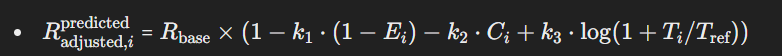

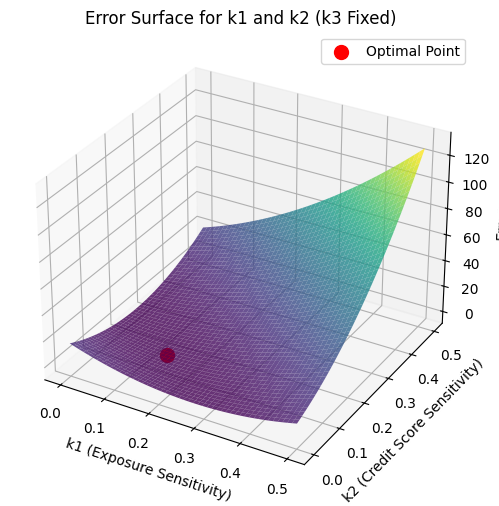

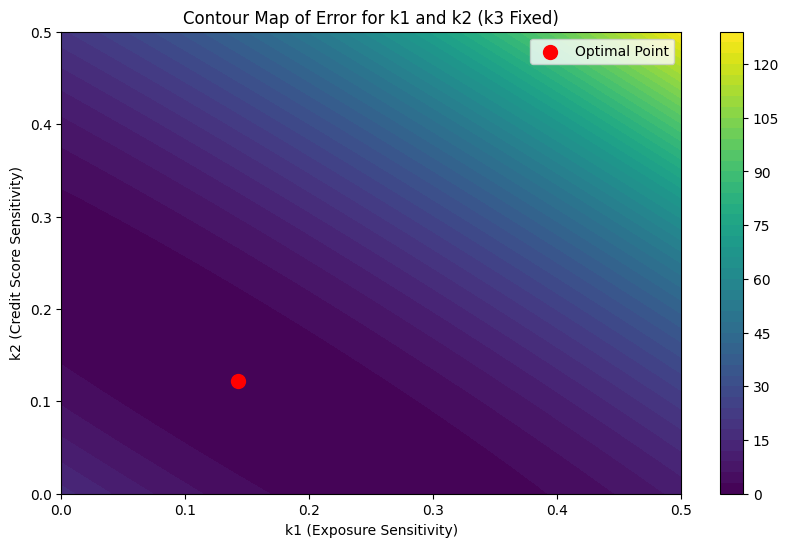

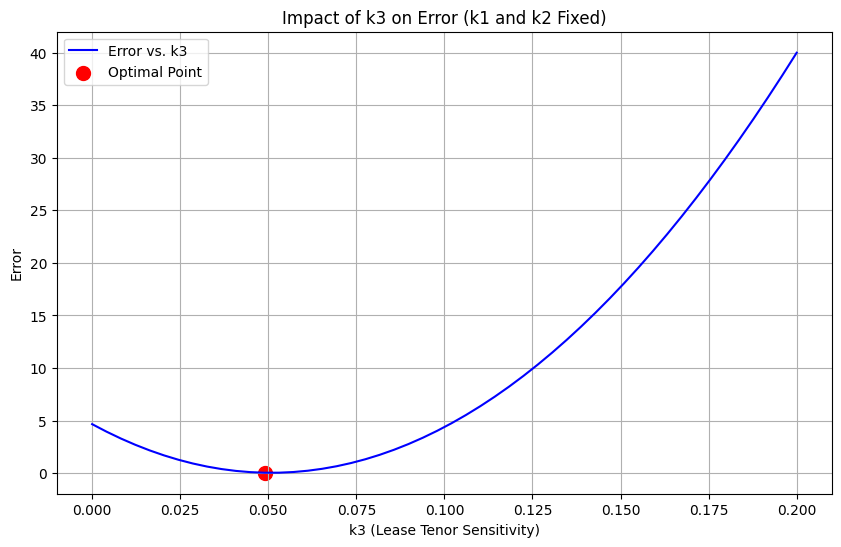

Optimal k1: 0.1429
Optimal k2: 0.1224
Optimal k3: 0.0490
Minimum Error: 0.035750


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data from CSV
data_file = "data.csv"
data_df = pd.read_csv(data_file)

# Extract data from DataFrame
data = data_df.to_dict(orient="records")  # Convert DataFrame to list of dictionaries

# Base lease rate and reference tenor
R_base = 0.30
T_ref = 12

# Objective function to calculate error
def compute_error(k1, k2, k3):
    error = 0
    for customer in data:
        E = customer["E"]
        C = customer["C"]
        T = customer["T"]
        R_target = customer["target"]
        
        # Predicted adjusted rate
        R_predicted = R_base * (1 - k1 * (1 - E) - k2 * C + k3 * np.log(1 + T / T_ref))
        
        # Squared error
        error += (R_predicted - R_target) ** 2
    return error

# Generate a grid of k1 and k2 values (fix k3)
k1_values = np.linspace(0, 0.5, 50)
k2_values = np.linspace(0, 0.5, 50)
k3_fixed = 0.05  # Fixed value for k3

k1_grid, k2_grid = np.meshgrid(k1_values, k2_values)
error_grid = np.zeros_like(k1_grid)

# Compute error for each combination of k1 and k2
for i in range(k1_grid.shape[0]):
    for j in range(k1_grid.shape[1]):
        k1 = k1_grid[i, j]
        k2 = k2_grid[i, j]
        error_grid[i, j] = compute_error(k1, k2, k3_fixed)

# Find the optimal point
min_error_index = np.unravel_index(np.argmin(error_grid), error_grid.shape)
optimal_k1 = k1_grid[min_error_index]
optimal_k2 = k2_grid[min_error_index]
optimal_error = error_grid[min_error_index]

# Plot the error surface with the optimal point marked
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(k1_grid, k2_grid, error_grid, cmap='viridis', alpha=0.8)
ax.scatter(optimal_k1, optimal_k2, optimal_error, color='red', s=100, label='Optimal Point')

# Labels and legend
ax.set_xlabel("k1 (Exposure Sensitivity)")
ax.set_ylabel("k2 (Credit Score Sensitivity)")
ax.set_zlabel("Error")
ax.set_title("Error Surface for k1 and k2 (k3 Fixed)")
ax.legend()

plt.show()

# Contour plot with the optimal point marked
plt.figure(figsize=(10, 6))
contour = plt.contourf(k1_grid, k2_grid, error_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.scatter(optimal_k1, optimal_k2, color='red', s=100, label='Optimal Point')

# Labels and legend
plt.xlabel("k1 (Exposure Sensitivity)")
plt.ylabel("k2 (Credit Score Sensitivity)")
plt.title("Contour Map of Error for k1 and k2 (k3 Fixed)")
plt.legend()
plt.show()

# Exploring k3's impact by fixing k1 and k2
k3_values = np.linspace(0, 0.2, 50)
error_k3 = []

k1_fixed = optimal_k1  # Use the optimal k1 from the surface plot
k2_fixed = optimal_k2  # Use the optimal k2 from the surface plot

# Compute error for varying k3
for k3 in k3_values:
    error_k3.append(compute_error(k1_fixed, k2_fixed, k3))

# Find the optimal k3
optimal_k3_index = np.argmin(error_k3)
optimal_k3 = k3_values[optimal_k3_index]
optimal_k3_error = error_k3[optimal_k3_index]

# Plot k3 vs. error with the optimal point marked
plt.figure(figsize=(10, 6))
plt.plot(k3_values, error_k3, label="Error vs. k3", color='blue')
plt.scatter(optimal_k3, optimal_k3_error, color='red', s=100, label='Optimal Point')

# Labels and legend
plt.xlabel("k3 (Lease Tenor Sensitivity)")
plt.ylabel("Error")
plt.title("Impact of k3 on Error (k1 and k2 Fixed)")
plt.legend()
plt.grid()
plt.show()

# Print optimal values
print(f"Optimal k1: {optimal_k1:.4f}")
print(f"Optimal k2: {optimal_k2:.4f}")
print(f"Optimal k3: {optimal_k3:.4f}")
print(f"Minimum Error: {optimal_error:.6f}")
